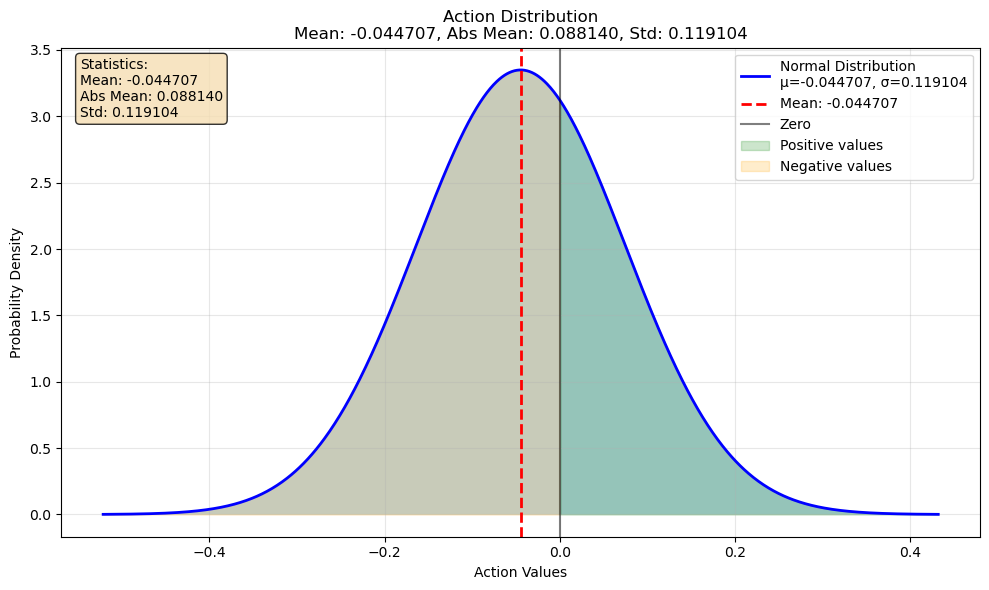

Distribution plot saved as 'action_distribution.png'


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Distribution statistics
# mean = -0.065168
# std = 0.204580
# abs_mean = 0.151679

# mean = -0.044707
# std = 0.119104
# abs_mean = 0.088140

mean = 0
std = 1
abs_mean = 0.088140

# Mean: -0.065168, Abs Mean: 0.151679, Std: 0.204580

# Create a range of x values
x = np.linspace(mean - 4*std, mean + 4*std, 1000)

# Generate normal distribution
y = stats.norm.pdf(x, mean, std)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label=f'Normal Distribution\nμ={mean:.6f}, σ={std:.6f}')
plt.fill_between(x, y, alpha=0.3)

# Add vertical lines for key statistics
plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean:.6f}')
plt.axvline(0, color='black', linestyle='-', alpha=0.5, label='Zero')

# Add shaded region for absolute values
x_pos = x[x >= 0]
y_pos = stats.norm.pdf(x_pos, mean, std)
x_neg = x[x < 0]
y_neg = stats.norm.pdf(x_neg, mean, std)

plt.fill_between(x_pos, y_pos, alpha=0.2, color='green', label='Positive values')
plt.fill_between(x_neg, y_neg, alpha=0.2, color='orange', label='Negative values')

# Formatting
plt.xlabel('Action Values')
plt.ylabel('Probability Density')
plt.title(f'Action Distribution\nMean: {mean:.6f}, Abs Mean: {abs_mean:.6f}, Std: {std:.6f}')
plt.legend()
plt.grid(True, alpha=0.3)

# Add text box with statistics
textstr = f'Statistics:\nMean: {mean:.6f}\nAbs Mean: {abs_mean:.6f}\nStd: {std:.6f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.savefig('action_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Distribution plot saved as 'action_distribution.png'") 

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

class ExampleModel(nn.Module):
    def __init__(self):
        super(ExampleModel, self).__init__()
        self.fc1 = nn.Linear(10, 20)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(20, 1)
        
    def forward(self, x):
        # Check if model is in training mode
        print(f"Model is in {'TRAINING' if self.training else 'EVALUATION'} mode")
        
        x = torch.relu(self.fc1(x))
        
        # Different behavior based on training mode
        if self.training:
            # During training: apply dropout and add some noise for regularization
            x = self.dropout(x)
            # Add small amount of noise during training
            x = x + 0.01 * torch.randn_like(x)
            print("  → Applied dropout and noise (training mode)")
        else:
            # During evaluation: no dropout, no noise, more stable computation
            print("  → Using stable computation (evaluation mode)")
        
        x = self.fc2(x)
        
        # Optional: different post-processing based on mode
        if not self.training:
            # During evaluation, you might want to apply additional constraints
            x = torch.clamp(x, min=-10, max=10)  # Clamp outputs for stability
            print("  → Applied output clamping (evaluation mode)")
        
        return x

def main():
    print("=" * 50)
    print("PyTorch Training Mode Example")
    print("=" * 50)
    
    # Create model and sample data
    model = ExampleModel()
    x = torch.randn(5, 10)  # Batch of 5 samples, 10 features each
    
    print("\n1. Initial state:")
    print(f"   model.training = {model.training}")
    
    print("\n2. Forward pass in default mode:")
    with torch.no_grad():
        output1 = model(x)
        print(f"   Output shape: {output1.shape}")
    
    print("\n3. Explicitly set to training mode:")
    model.train()  # Set to training mode
    print(f"   model.training = {model.training}")
    with torch.no_grad():
        output2 = model(x)
    
    print("\n4. Switch to evaluation mode:")
    model.eval()  # Set to evaluation mode
    print(f"   model.training = {model.training}")
    with torch.no_grad():
        output3 = model(x)
    
    print("\n5. Toggle training mode with boolean:")
    model.train(True)   # Same as model.train()
    print(f"   model.train(True) → model.training = {model.training}")
    
    model.train(False)  # Same as model.eval()
    print(f"   model.train(False) → model.training = {model.training}")
    
    print("\n6. Checking training mode in custom logic:")
    
    def custom_inference(model, data):
        """Custom function that behaves differently based on training mode"""
        if model.training:
            print("   → Running in training mode: using fast approximation")
            # Simulate faster but less accurate computation
            return model(data) * 0.95  # Slight adjustment for training
        else:
            print("   → Running in evaluation mode: using precise computation")
            # Simulate more careful computation
            with torch.no_grad():
                result = model(data)
                # Additional validation during evaluation
                if torch.isnan(result).any():
                    print("   ⚠️  NaN detected in evaluation!")
                return result
    
    model.train()
    result_train = custom_inference(model, x)
    
    model.eval()
    result_eval = custom_inference(model, x)
    
    print(f"\n   Training result mean: {result_train.mean().item():.4f}")
    print(f"   Evaluation result mean: {result_eval.mean().item():.4f}")
    
    print("\n7. Context manager example:")
    
    # Save current training state
    original_mode = model.training
    print(f"   Original mode: {'training' if original_mode else 'eval'}")
    
    # Temporarily switch to evaluation
    model.eval()
    print(f"   Switched to: {'training' if model.training else 'eval'}")
    
    # Do some evaluation work
    with torch.no_grad():
        eval_output = model(x)
    
    # Restore original mode
    model.train(original_mode)
    print(f"   Restored to: {'training' if model.training else 'eval'}")
    
    print("\n8. Real training loop example:")
    
    # Setup for training
    model.train()  # Make sure we're in training mode
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    criterion = nn.MSELoss()
    
    # Dummy target
    target = torch.randn(5, 1)
    
    print(f"   Starting training loop (model.training = {model.training})")
    
    # Training step
    optimizer.zero_grad()
    output = model(x)  # This will show training mode behavior
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    
    print(f"   Training loss: {loss.item():.4f}")
    
    # Evaluation step
    model.eval()  # Switch to evaluation mode
    print(f"   Switched to evaluation (model.training = {model.training})")
    
    with torch.no_grad():
        eval_output = model(x)  # This will show evaluation mode behavior
        eval_loss = criterion(eval_output, target)
    
    print(f"   Evaluation loss: {eval_loss.item():.4f}")
    
    print("\n" + "=" * 50)
    print("Key Takeaways:")
    print("• model.training returns True/False")
    print("• model.train() sets training mode")
    print("• model.eval() sets evaluation mode") 
    print("• Different behaviors can be implemented based on mode")
    print("• Always set appropriate mode before inference!")
    print("=" * 50)

if __name__ == "__main__":
    main() 

PyTorch Training Mode Example

1. Initial state:
   model.training = True

2. Forward pass in default mode:
Model is in TRAINING mode
  → Applied dropout and noise (training mode)
   Output shape: torch.Size([5, 1])

3. Explicitly set to training mode:
   model.training = True
Model is in TRAINING mode
  → Applied dropout and noise (training mode)

4. Switch to evaluation mode:
   model.training = False
Model is in EVALUATION mode
  → Using stable computation (evaluation mode)
  → Applied output clamping (evaluation mode)

5. Toggle training mode with boolean:
   model.train(True) → model.training = True
   model.train(False) → model.training = False

6. Checking training mode in custom logic:
   → Running in training mode: using fast approximation
Model is in TRAINING mode
  → Applied dropout and noise (training mode)
   → Running in evaluation mode: using precise computation
Model is in EVALUATION mode
  → Using stable computation (evaluation mode)
  → Applied output clamping (evalua

b_max= 1.0, b_min=0.05:
[0.02858354 0.0648048  0.09967548 0.13324593 0.16556464]
b_max= 1.0, b_min=0.05: beta_range=[0.0286, 0.1656], final_alpha_cumprod=0.5916
b_max= 2.0, b_min=0.10:
[0.05635005 0.12540994 0.18941575 0.24873738 0.30371763]
b_max= 2.0, b_min=0.10: beta_range=[0.0564, 0.3037], final_alpha_cumprod=0.3499
b_max= 3.0, b_min=0.10:
[0.07503557 0.1763421  0.26655304 0.34688366 0.41841608]
b_max= 3.0, b_min=0.10: beta_range=[0.0750, 0.4184], final_alpha_cumprod=0.2122
b_max= 3.0, b_min=0.01:
[0.05992912 0.16589835 0.25992223 0.34334729 0.41736829]
b_max= 3.0, b_min=0.01: beta_range=[0.0599, 0.4174], final_alpha_cumprod=0.2220
b_max= 3.0, b_min=0.50:
[0.13929202 0.22119922 0.29531191 0.36237185 0.42305019]
b_max= 3.0, b_min=0.50: beta_range=[0.1393, 0.4231], final_alpha_cumprod=0.1738
b_max= 3.0, b_min=1.00:
[0.21337214 0.27385096 0.32967995 0.38121661 0.42879094]
b_max= 3.0, b_min=1.00: beta_range=[0.2134, 0.4288], final_alpha_cumprod=0.1353
b_max=15.0, b_min=5.00:
[0.6988057

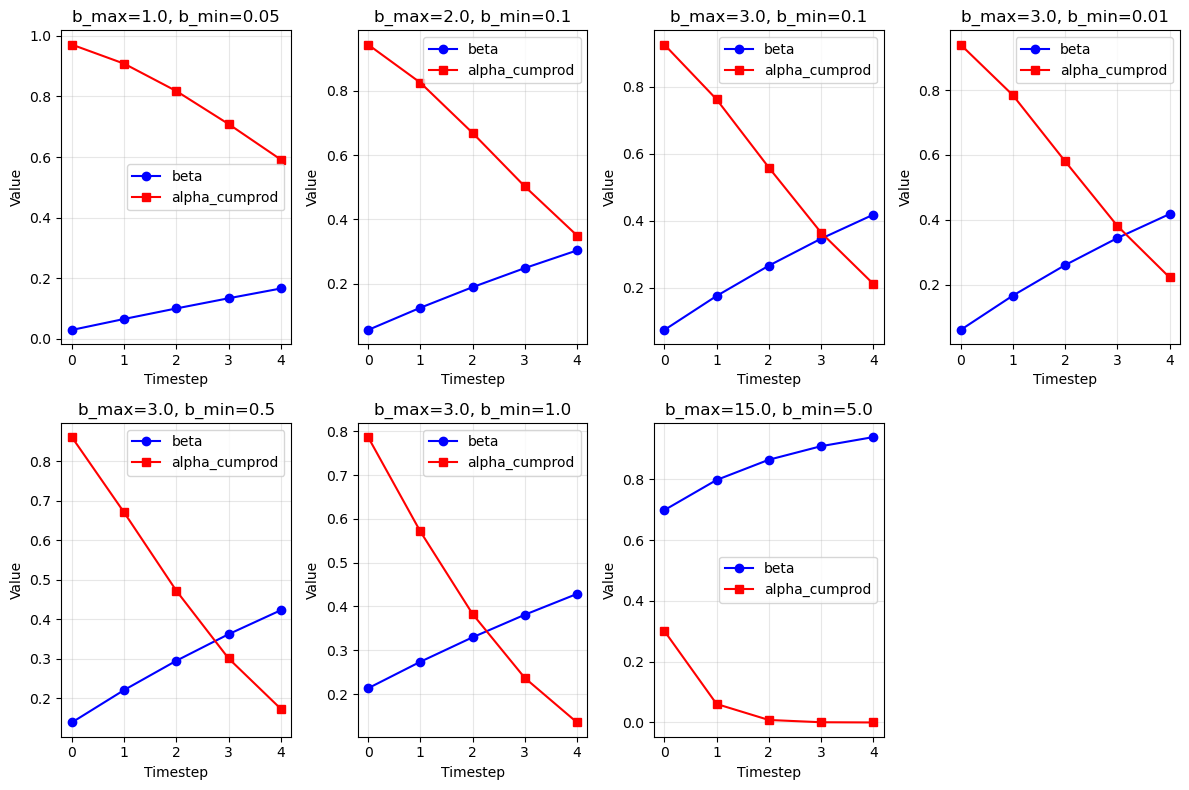


详细分析 (b_max=10.0, b_min=0.1):
所有beta值: [0.19587456 0.45881819 0.63578102 0.75487819 0.83503138]
所有alpha值: [0.80412544 0.54118181 0.36421898 0.24512181 0.16496862]
所有alpha_cumprod值: [0.80412544 0.43517806 0.15850011 0.03885183 0.00640933]


In [11]:
import numpy as np
import matplotlib.pyplot as plt

def vp_beta_schedule(timesteps, b_max=10., b_min=0.1):
    t = np.arange(1, timesteps + 1)
    T = timesteps
    alpha = np.exp(-b_min / T - 0.5 * (b_max - b_min) * (2 * t - 1) / T ** 2)
    betas = 1 - alpha
    return betas

# 测试不同的b_max和b_min组合
t = 5
configs = [
    (1.0, 0.05),   # 原始设置
    (2.0, 0.1),    # 较小的b_max
    (3.0, 0.1),   # 较大的b_max
    (3.0, 0.01),  # 较小的b_min
    (3.0, 0.5),   # 较大的b_min
    (3.0, 1.0),    # 都较小
    (15.0, 5.0),  # 都较大
]

plt.figure(figsize=(12, 8))

for i, (b_max, b_min) in enumerate(configs):
    betas = vp_beta_schedule(t, b_max, b_min)
    alphas = 1 - betas
    alphas_cumprod = np.cumprod(alphas)
    print(f"b_max={b_max:4.1f}, b_min={b_min:4.2f}:")
    print(betas)
    
    plt.subplot(2, 4, i+1)
    plt.plot(betas, 'b-o', label=f'beta')
    plt.plot(alphas_cumprod, 'r-s', label=f'alpha_cumprod')
    plt.title(f'b_max={b_max}, b_min={b_min}')
    plt.xlabel('Timestep')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    print(f"b_max={b_max:4.1f}, b_min={b_min:4.2f}: beta_range=[{betas[0]:.4f}, {betas[-1]:.4f}], final_alpha_cumprod={alphas_cumprod[-1]:.4f}")

plt.tight_layout()
plt.show()

# 详细查看一个配置
b_max, b_min = 10.0, 0.1
betas = vp_beta_schedule(t, b_max, b_min)
alphas = 1 - betas
alphas_cumprod = np.cumprod(alphas)

print(f"\n详细分析 (b_max={b_max}, b_min={b_min}):")
print(f"所有beta值: {betas}")
print(f"所有alpha值: {alphas}")
print(f"所有alpha_cumprod值: {alphas_cumprod}")

s=0.008: beta_range=[0.1013, 0.9990], final_alpha_cumprod=0.0001
s=0.010: beta_range=[0.1027, 0.9990], final_alpha_cumprod=0.0001
s=0.020: beta_range=[0.1096, 0.9990], final_alpha_cumprod=0.0001
s=0.050: beta_range=[0.1286, 0.9990], final_alpha_cumprod=0.0001
s=0.100: beta_range=[0.1555, 0.9990], final_alpha_cumprod=0.0001


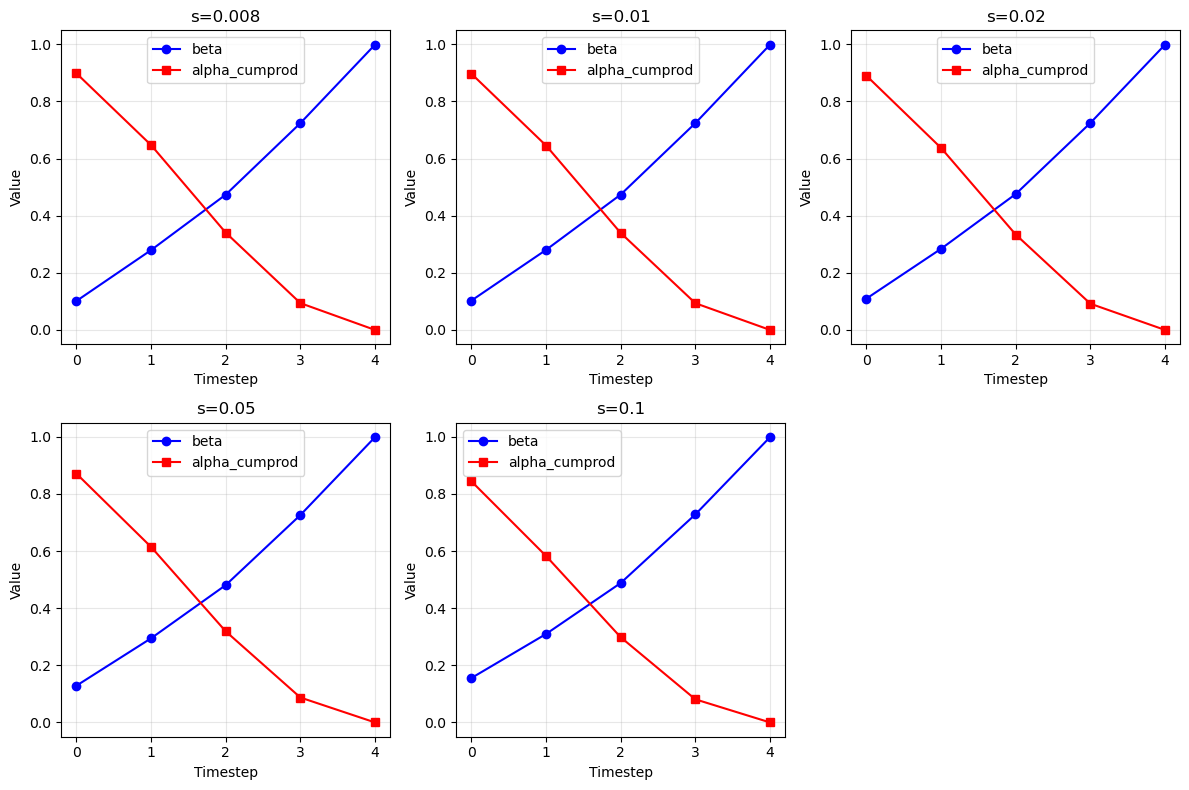


详细分析 (T=5, s=0.008):
所有beta值: [0.10129408 0.27954385 0.47363535 0.72405237 0.999     ]
所有alpha值: [0.89870592 0.72045615 0.52636465 0.27594763 0.001     ]
所有alpha_cumprod值: [8.98705921e-01 6.47478211e-01 3.40809640e-01 9.40456127e-02
 9.40456127e-05]


In [13]:
import numpy as np
import matplotlib.pyplot as plt

def cosine_beta_schedule(timesteps, s=0.008):
    """
    cosine schedule
    as proposed in https://openreview.net/forum?id=-NEXDKk8gZ
    """
    steps = timesteps + 1
    x = np.linspace(0, steps, steps)
    alphas_cumprod = np.cos(((x / steps) + s) / (1 + s) * np.pi * 0.5) ** 2
    alphas_cumprod = alphas_cumprod / alphas_cumprod[0]
    betas = 1 - (alphas_cumprod[1:] / alphas_cumprod[:-1])
    betas_clipped = np.clip(betas, a_min=0, a_max=0.999)
    return betas_clipped

# 测试t=5时不同的s值
t = 5
s_values = [0.008, 0.01, 0.02, 0.05, 0.1]

plt.figure(figsize=(12, 8))

for i, s in enumerate(s_values):
    betas = cosine_beta_schedule(t, s=s)
    alphas_cumprod = np.cumprod(1 - betas)
    
    plt.subplot(2, 3, i+1)
    plt.plot(betas, 'b-o', label=f'beta')
    plt.plot(alphas_cumprod, 'r-s', label=f'alpha_cumprod')
    plt.title(f's={s}')
    plt.xlabel('Timestep')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    print(f"s={s:5.3f}: beta_range=[{betas[0]:.4f}, {betas[-1]:.4f}], final_alpha_cumprod={alphas_cumprod[-1]:.4f}")

plt.tight_layout()
plt.show()

# 详细查看一个配置
s = 0.008
betas = cosine_beta_schedule(t, s)
alphas_cumprod = np.cumprod(1 - betas)

print(f"\n详细分析 (T={t}, s={s}):")
print(f"所有beta值: {betas}")
print(f"所有alpha值: {1 - betas}")
print(f"所有alpha_cumprod值: {alphas_cumprod}")